In [1]:
import pandas as pd
import plotly.graph_objs as go


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/austinlasseter/plotly_dash_tutorial/master/00%20resources/titanic.csv")

In [3]:
df.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,0,3,male,22.0,7.2500,Southampton
1,1,1,1,female,38.0,71.2833,Cherbourg
2,2,1,3,female,26.0,7.9250,Southampton
3,3,1,1,female,35.0,53.1000,Southampton
4,4,0,3,male,35.0,8.0500,Southampton


In [4]:
df['Female']=df['Sex'].map({'male':0, 'female':1})

In [5]:
df['Cabin Class'] = df['Pclass'].map({1:'first', 2: 'second', 3:'third'})
df.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,Fare,Embarked,Female,Cabin Class
0,0,0,3,male,22.0,7.2500,Southampton,0,third
1,1,1,1,female,38.0,71.2833,Cherbourg,1,first
2,2,1,3,female,26.0,7.9250,Southampton,1,third
3,3,1,1,female,35.0,53.1000,Southampton,1,first
4,4,0,3,male,35.0,8.0500,Southampton,0,third


In [6]:
df['death_var']=df['Survived'].map({0:'died', 1: 'lived'})
df.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,Fare,Embarked,Female,Cabin Class,death_var
0,0,0,3,male,22.0,7.2500,Southampton,0,third,died
1,1,1,1,female,38.0,71.2833,Cherbourg,1,first,lived
2,2,1,3,female,26.0,7.9250,Southampton,1,third,lived
3,3,1,1,female,35.0,53.1000,Southampton,1,first,lived
4,4,0,3,male,35.0,8.0500,Southampton,0,third,died


In [7]:
# Create a list with those 5 values as cut points. (props if you can do this without hard-coding them!)
mybins=[0,18,30,60,80]

# Create some labels for the new variable. NOTE: There are 5 cut points but only four labels. Why is that?
mylabels=['1 children', '2 young adult', '3 middle-aged', '4 elderly']
# Use the .cut method to create a new variable using those cut points and labels.
df['age_groups']= pd.cut(df['Age'], bins=mybins, labels=mylabels)
# Check it out!
df[['Age','age_groups']].head()

,Age,age_groups
0,22.0,2 young adult
1,38.0,3 middle-aged
2,26.0,2 young adult
3,35.0,3 middle-aged
4,35.0,3 middle-aged


In [8]:
# Create 5 cut points for our new bins.
farebins=[0,8,15,33,512]
# Create 4 labels (wait, why only four?)
farelabels=['1 low', '2 medium', '3 high','4 very high']
# Create the new variable using pd.cut
df['fare_groups']= pd.cut(df['Fare'], bins=farebins, labels=farelabels)
# Check it out.
df[['Fare', 'fare_groups']].head()

,Fare,fare_groups
0,7.2500,1 low
1,71.2833,4 very high
2,7.9250,1 low
3,53.1000,4 very high
4,8.0500,2 medium


## Summary statistics

In [9]:
df.columns

Index(['Unnamed: 0', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'Female', 'Cabin Class', 'death_var', 'age_groups', 'fare_groups'],
      dtype='object')

In [10]:
# What are the categorical variables?
cats=['Sex','Embarked', 'Cabin Class','death_var', 'age_groups', 'fare_groups']

In [11]:
# What are the continuous variables?
cons=['Survived', 'Age', 'Fare', 'Female']

### Single bar chart (counts)

Southampton    554
Cherbourg      130
Queenstown      28
Name: Embarked, dtype: int64


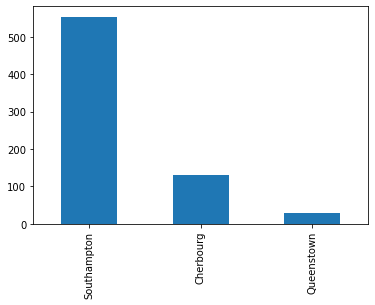

In [12]:
# What are the frequencies for Embarked?
embarked_counts = df['Embarked'].value_counts()
print(embarked_counts)
# Turn that into a bar chart.
embarked_counts.plot(kind = 'bar');

### Single bar chart (percents)

In [13]:
# survival by cabin class?
cab_survive = df.groupby('Cabin Class')['Survived'].mean()
cab_survive

Cabin Class
first     0.652174
second    0.479769
third     0.239437
Name: Survived, dtype: float64

### Grouped bar chart

In [14]:
# Sex by embarkation
sex_embark = pd.crosstab(df['Sex'], df['Embarked'])
sex_embark

Embarked,Cherbourg,Queenstown,Southampton
Sex,,,
female,61,12,186
male,69,16,368


## Grouped bar chart (3 variables)

In [15]:
results=pd.DataFrame(df.groupby(['Sex', 'Embarked'])['Fare'].mean())
results

Fare
Sex    Embarked              
female Cherbourg    79.937502
       Queenstown   17.363892
       Southampton  38.572827
male   Cherbourg    58.005683
       Queenstown   18.942187
       Southampton  21.867706

In [16]:
# So to better understand how this works, we need to know multi-indexing.
print(results.loc['male'].index)
results.loc['male']['Fare']

Index(['Cherbourg', 'Queenstown', 'Southampton'], dtype='object', name='Embarked')


Embarked
Cherbourg      58.005683
Queenstown     18.942187
Southampton    21.867706
Name: Fare, dtype: float64

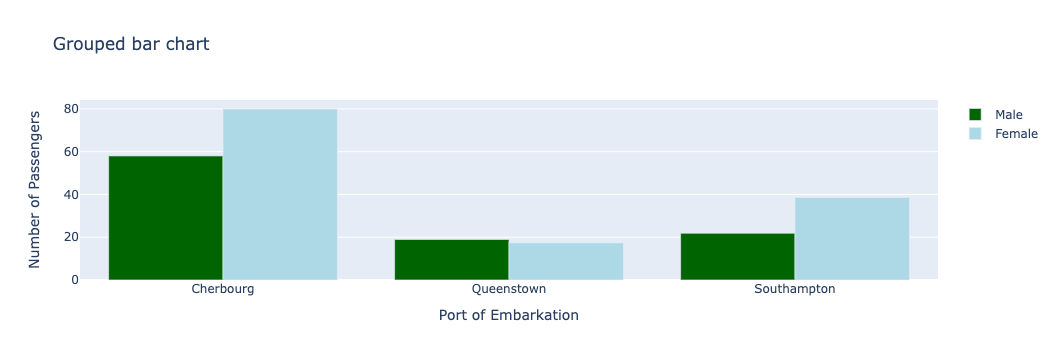

In [19]:
# Let's display that with plotly.
mydata1 = go.Bar(
    x=results.loc['male'].index,
    y=results.loc['male']['Fare'],
    name='Male',
    marker=dict(color='darkgreen')
)
mydata2 = go.Bar(
    x=results.loc['female'].index,
    y=results.loc['female']['Fare'],
    name='Female',
    marker=dict(color='lightblue')
)

mylayout = go.Layout(
    title='Grouped bar chart',
    xaxis = dict(title = 'Port of Embarkation'), # x-axis label
    yaxis = dict(title = 'Number of Passengers'), # y-axis label
    
)
fig = go.Figure(data=[mydata1, mydata2], layout=mylayout)
fig.show()

## Cabin class by port of embarkation

In [20]:
# continuous_var='Fare'
# continuous_var='Age'
# continuous_var='Female'
continuous_var='Survived'

In [21]:
results=pd.DataFrame(df.groupby(['Cabin Class', 'Embarked'])[continuous_var].mean())
results

Survived
Cabin Class Embarked             
first       Cherbourg    0.716216
            Queenstown   0.500000
            Southampton  0.611111
second      Cherbourg    0.533333
            Queenstown   0.500000
            Southampton  0.474359
third       Cherbourg    0.439024
            Queenstown   0.250000
            Southampton  0.210345

In [22]:
# So to better understand how this works, we need to know multi-indexing.
print(results.loc['first'].index)
results.loc['first'][continuous_var]

Index(['Cherbourg', 'Queenstown', 'Southampton'], dtype='object', name='Embarked')


Embarked
Cherbourg      0.716216
Queenstown     0.500000
Southampton    0.611111
Name: Survived, dtype: float64

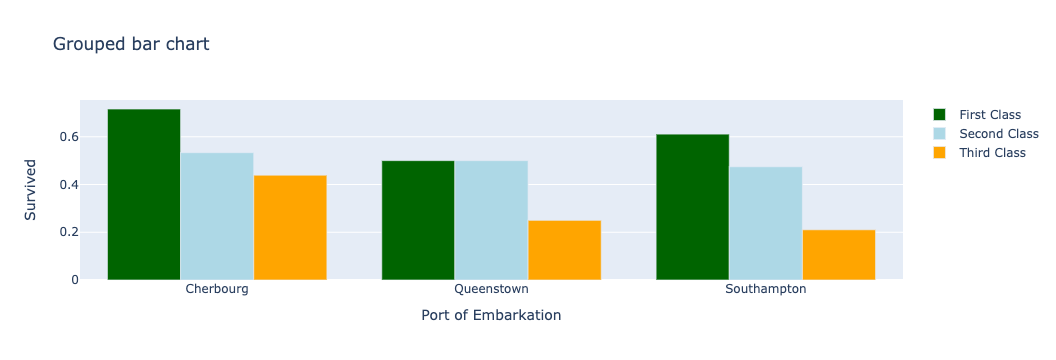

In [23]:
# Let's display that with plotly.
mydata1 = go.Bar(
    x=results.loc['first'].index,
    y=results.loc['first'][continuous_var],
    name='First Class',
    marker=dict(color='darkgreen')
)
mydata2 = go.Bar(
    x=results.loc['second'].index,
    y=results.loc['second'][continuous_var],
    name='Second Class',
    marker=dict(color='lightblue')
)
mydata3 = go.Bar(
    x=results.loc['third'].index,
    y=results.loc['third'][continuous_var],
    name='Third Class',
    marker=dict(color='orange')
)

mylayout = go.Layout(
    title='Grouped bar chart',
    xaxis = dict(title = 'Port of Embarkation'), # x-axis label
    yaxis = dict(title = str(continuous_var)), # y-axis label
    
)
fig = go.Figure(data=[mydata1, mydata2, mydata3], layout=mylayout)
fig.show()